In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Loading Reduced feature Training set
X_train_red = pd.read_csv('X_train_final.csv')
y_train = pd.read_csv('y_train.final.csv')

In [3]:
# Loading Reduced feature Test set
X_test_red = pd.read_csv('X_test_final.csv')
y_test = pd.read_csv('y_test.final.csv')

### Since the tuned  Random Forest Classifier has one of the highest test set roc_auc score & Reward-Risk Ratio as well as one of the least training time complexity, it is the model of choice for this problem.

In [4]:
# Importing the best tuned Random Forest Classifier
import joblib
rf = joblib.load('Rand_Forest_Reduced.joblib')

In [5]:
# Making the predictions on the Reduced Feature Test Set using the tuned Random Forest Classifier
y_preds = rf.predict_proba(X_test_red)[:,1]

### Calculating the optimal probability threshold value from the roc curve that would give us the best TPR or Recall viz a viz FPR on the test or unseen data. _Note: Optimal Prob. threshold is one where diff between tpr & fpr is max._

In [6]:
from sklearn.metrics import roc_curve

In [7]:
# Calculating False Positive Rate(fpr), True Positive Rate(tpr) & Prob Threshold values from sklearn's roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

In [8]:
# Finding the best threshold probability
optimal_idx = np.argmax((tpr - fpr))# Optimal threshold is one where diff between tpr & fpr is max.
optimal_threshold = thresholds[optimal_idx]
print("The optimum probability threshold value that gives best model recall viz a viz fpr is: ",optimal_threshold)

The optimum probability threshold value that gives best model recall viz a viz fpr is:  0.5186797366946175


In [15]:
# Defining the function for plotting the roc_auc curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color='orange', label='Random forest ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', Label='Random Guessing ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for the tuned Random Forest Classifier')
    plt.legend()
    plt.show()

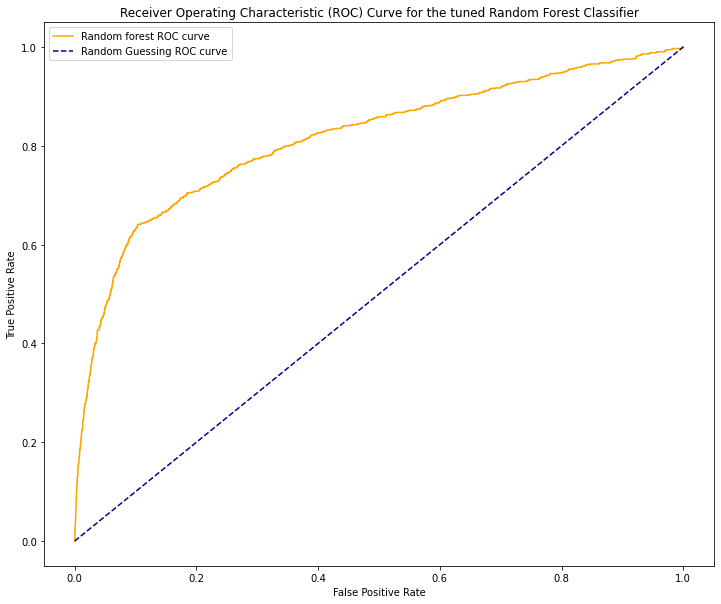

In [16]:
# Plotting the roc curve
plot_roc_curve(fpr, tpr)

In [17]:
# Importing the Sklearn's roc_auc_score module
from sklearn.metrics import roc_auc_score

In [21]:
print('The area under the Random forest classifier roc curve is: ',roc_auc_score(y_test, y_preds))

The area under the Random forest classifier roc curve is:  0.815116647601302


In [19]:
print('The value of model recall corresponding to optimal probability threshold is: ',tpr[optimal_idx])

The value of model recall corresponding to optimal probability threshold is:  0.6411637931034483


In [20]:
print('The value of model FPR corresponding to optimal probability threshold is: ',fpr[optimal_idx])

The value of model FPR corresponding to optimal probability threshold is:  0.1039671682626539


### The above  calculated (fpr, tpr) point, with coordinates (0.1039671682626539, 0.6411637931034483,) , corresponding to the optimal probability threshold can be clearly seen on the above roc plot. Thus in order to maximize recall viz. a viz. FPR , any test observation with conditional prob (outputted by RF classifier) > 0.5186797366946175 , should be classified as belonging to class 1.